In [15]:
import lightkurve as lk

In [34]:
search_result = lk.search_targetpixelfile('TOI-503', mission='TESS')

In [35]:
search_result

SearchResult containing 11 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 07 2019      SPOC     120   186812530      0.0
  1 TESS Sector 07 2019 TESS-SPOC    1800   186812530      0.0
  2 TESS Sector 34 2021      SPOC      20   186812530      0.0
  3 TESS Sector 34 2021      SPOC     120   186812530      0.0
  4 TESS Sector 34 2021 TESS-SPOC     600   186812530      0.0
  5 TESS Sector 44 2021      SPOC     120   186812530      0.0
  6 TESS Sector 44 2021 TESS-SPOC     600   186812530      0.0
  7 TESS Sector 45 2021      SPOC     120   186812530      0.0
  8 TESS Sector 45 2021 TESS-SPOC     600   186812530      0.0
  9 TESS Sector 46 2021      SPOC     120   186812530      0.0
 10 TESS Sector 46 2021 TESS-SPOC     600   186812530      0.0

/Users/kabathpetr/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


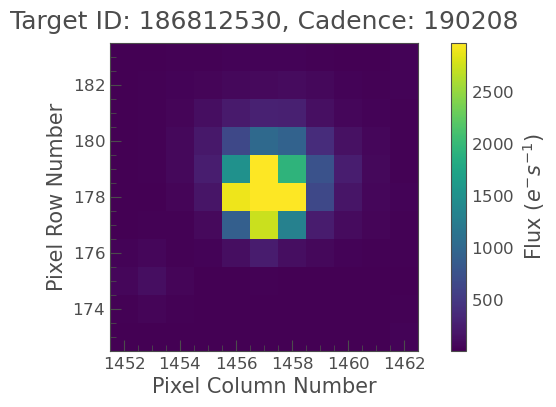

In [36]:
from lightkurve import search_targetpixelfile
#pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();

pixelfile = lk.search_targetpixelfile('TOI-503', mission='TESS')#.download();  DOES NOT WORK CURRENTLY download()
pixelfile.table["dataURL"]=pixelfile.table["dataURI"]

tes = pixelfile.download()
tes.plot(frame=1);


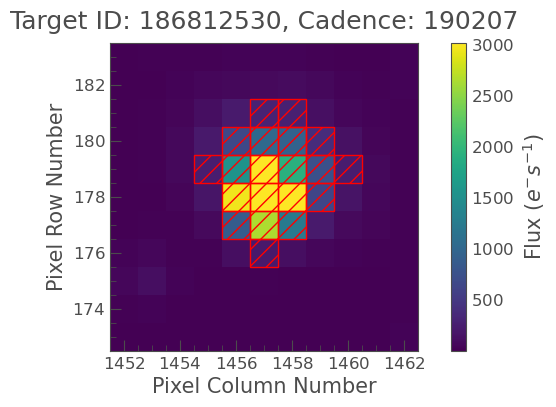

In [37]:
%matplotlib inline
tes.plot(aperture_mask=tes.pipeline_mask);

In [38]:
lc = tes.to_lightcurve()

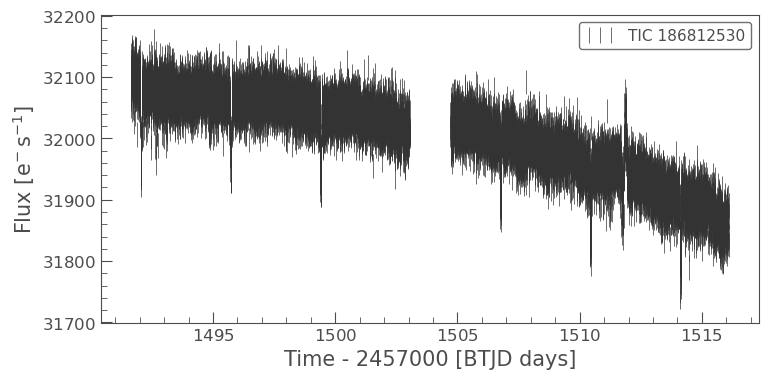

In [39]:
lc.errorbar();

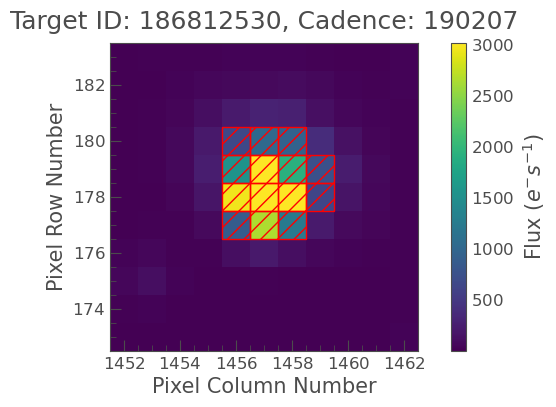

In [40]:
aperture_mask = tes.create_threshold_mask(threshold=10)

# Plot that aperture
tes.plot(aperture_mask=aperture_mask);

In [41]:
lc = tes.to_lightcurve(aperture_mask=aperture_mask)

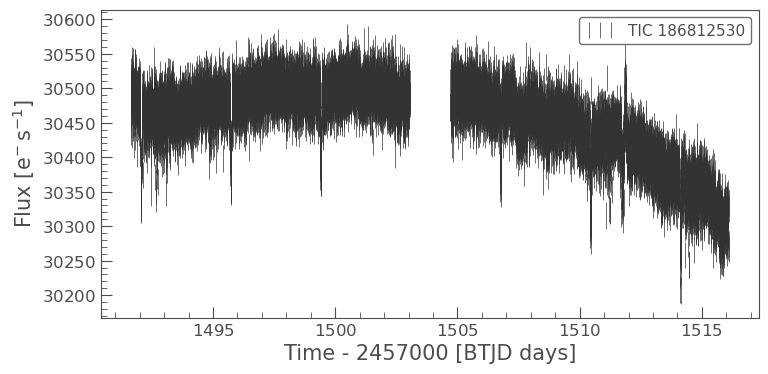

In [42]:
lc.errorbar();

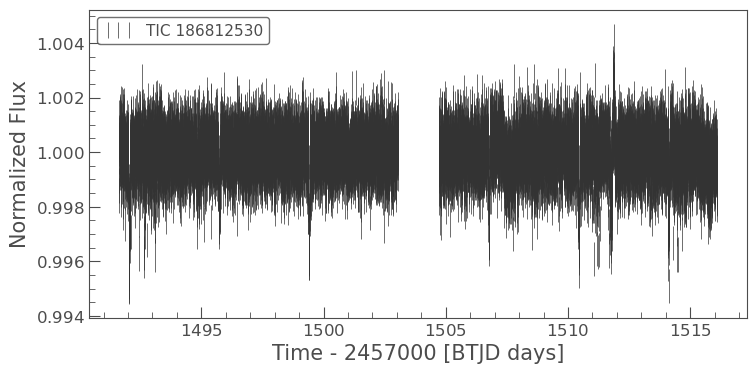

In [43]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

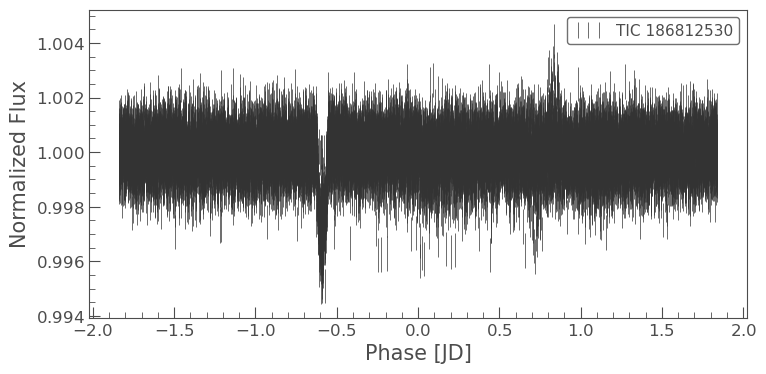

In [44]:
folded_lc = flat_lc.fold(period=3.6772, epoch_time=1500.0)
folded_lc.errorbar();

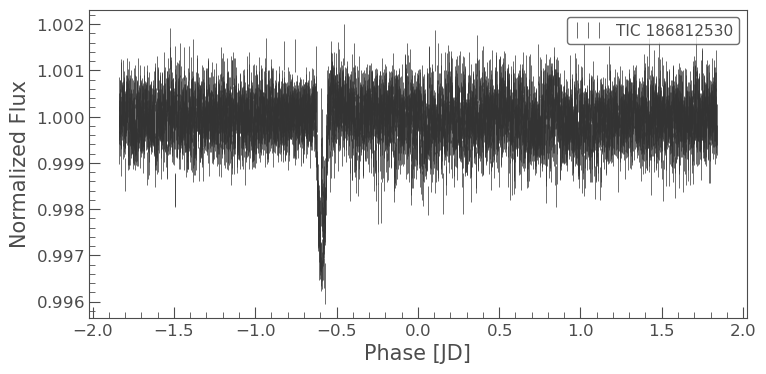

In [45]:
import astropy.units as u
binned_lc = folded_lc.bin(time_bin_size=1*u.minute)
binned_lc.errorbar();

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

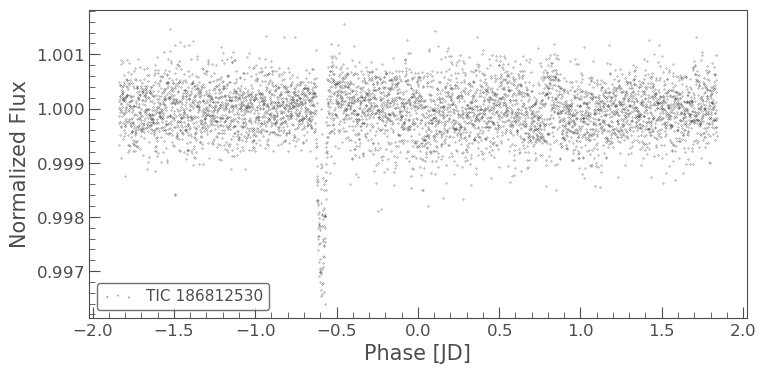

In [48]:
binned_lc.scatter(s=0.2)